In this project, we will be using CNN to build a Cat vs Dog Classifier and by applying the techinque of Data Augumentation we will observe how the overfitting is reduced. The dataset that we will be using is Cat vs Dog dataset from kaggle. Below is the link for the dataset.

https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:11<00:00, 135MB/s]
100% 1.06G/1.06G [00:11<00:00, 97.8MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip.extractall('/content')
zip.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten

#Generators

In [ ]:
## So we either extract different images from train and test label then then give to the model however in doing to RAM runout of
## space. So wayout for that would be generator - which basiscally divides the data into batches and then send in Ram once 1st back
## is over its send another batch due to which RAM don't go out of space
## Keras has a built-in generator with the name of 'image_dataset_from_directory'

# tf.keras.utils.image_dataset_from_directory(
#     directory,
#     labels="inferred",
#     label_mode="int",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(256, 256),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False,
#     **kwargs
# )

## This is the defination for the his generator

# directory = we need to define the path

# Labels = what labels we need to give , generally value is 'inferred' means labels are generated from the directory structure
# or give data, 'None' > means NO Labels

# label_mode =  "int": means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
#  - "categorical" means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
# - "binary" means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1
#  (e.g. for binary_crossentropy). - None (no labels).
# In out case it is will encode with 0 and 1 as we have 2 class cats and dogs
# 0 will be assinged to 'cats' and 1 will be assigned to 'Dogs'


# batch_size = Size of the each batch

# Image Size = We can set out image size as images in the data could in of different size, this features helps us to make
# them of similar size.

# we will generate 2 Generators, 1 for Training Data and 2nd for Testing Data

from keras.utils import image_dataset_from_directory

# Training Generator

train_ds = image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

# Validation Generator

# We will keep all the parameters same, Just change path.

validation_ds = image_dataset_from_directory(
    directory= '/content/test',
    labels= 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


As we can see,
Training_ds has 20k Images and
Validation/Testing_ds has 5k Images

In [ ]:
## Normalization

# Basically this data we get from the generator is stored in the form of Numpy-Array but the issue that every value of Numpy
# Array is between 0-255, and we need to make it between 0 to 1 so basically Normalization is required
# To perform the normoalization, we need to use divide the pixel value by 255. We cannot do it normally
# train_ds and validation_ds are Genrator Object of tensorflow and have labels associated to it so we need to write a function
# to perform the normalization and we will be using tensoflow.cast function for division operation
# which basically change the dtype of tensor.



def normalize(Image, label):
  image = tf.cast(Image/255.0, dtype= tf.float64)

  return image, label


## To apply the function to train_ds and valdiation_ds we will be using .map() fucntion

train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

# Building the CNN Model


In [ ]:
## Building CNN Model

## Setup = 3 Conv layer with Max Polling and 2 Fully Connected layer with 128 and 64 nodes
## First Conv = 32 Filters
## 2nd Conv = 64 Filters
## 3rd Conv = 128 Filetrs

model = Sequential()
# Conv 1
model.add(Conv2D(32, kernel_size = (3,3), padding ='valid', activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding= 'valid'))
# Conv 2
model.add(Conv2D(64, kernel_size = (3,3), padding ='valid', activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding= 'valid'))
# Conv 3
model.add(Conv2D(128, kernel_size = (3,3), padding ='valid', activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding= 'valid'))
#Flattening
model.add(Flatten())
# Full Connected 2 Layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
# Training

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_ds, epochs =10 , validation_data = (validation_ds))

Epoch 1/10
625/625 [==============================] - 81s 126ms/step - loss: 0.6365 - accuracy: 0.6319 - val_loss: 0.5625 - val_accuracy: 0.7112
Epoch 2/10
625/625 [==============================] - 77s 123ms/step - loss: 0.5173 - accuracy: 0.7420 - val_loss: 0.4781 - val_accuracy: 0.7734
Epoch 3/10
625/625 [==============================] - 80s 127ms/step - loss: 0.4311 - accuracy: 0.7980 - val_loss: 0.4374 - val_accuracy: 0.7982
Epoch 4/10
625/625 [==============================] - 78s 124ms/step - loss: 0.3223 - accuracy: 0.8572 - val_loss: 0.4791 - val_accuracy: 0.7986
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2044 - accuracy: 0.9158 - val_loss: 0.6355 - val_accuracy: 0.7924
Epoch 6/10
625/625 [==============================] - 78s 124ms/step - loss: 0.1146 - accuracy: 0.9563 - val_loss: 0.9064 - val_accuracy: 0.7902
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.0699 - accuracy: 0.9751 - val_loss: 1.0561 - val_ac

There are total 625 Batchs in each epochs of size 32, 625*32 = 20000

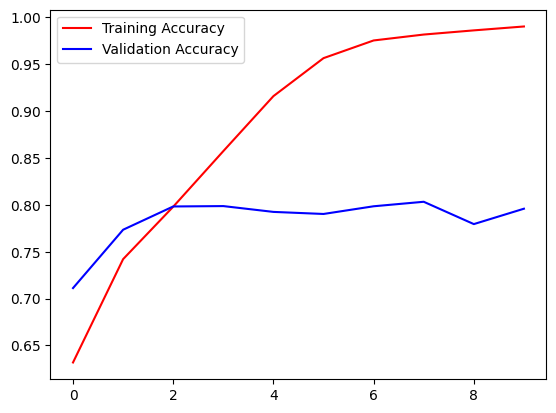

In [ ]:
## Ploting the accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color ='blue',label = 'Validation Accuracy')
plt.legend()
plt.show()

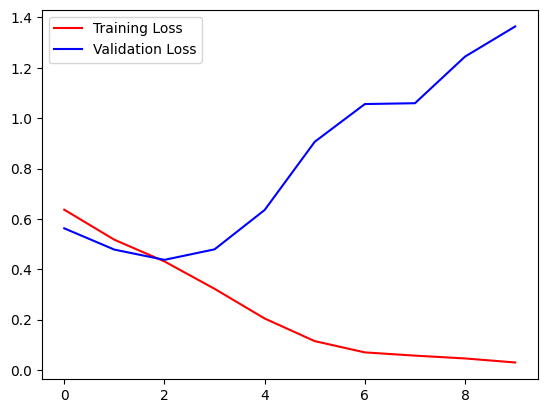

In [ ]:
## Ploting the Loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color = 'red', label = 'Training Loss')
plt.plot(history.history['val_loss'], color ='blue',label = 'Validation Loss')
plt.legend()
plt.show()

Clearly the resutls are overfitting. Model is an Overfitting Model

In [ ]:
## Ways to Reduce Overfitting

# Add More Data = Not Possible in our case as we have uses all of our data
# Data Augmentation = Will Do it later
# L1/L2 Regularization
# Dropout
# Batch Normalization
# Reduce Complexity

## We will work with 2 techniques in this model
## Drop out and Batch Normalization and then review the output


model = Sequential()
# Conv 1
model.add(Conv2D(32, kernel_size = (3,3), padding ='valid', activation='relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding= 'valid'))
# Conv 2
model.add(Conv2D(64, kernel_size = (3,3), padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding= 'valid'))
# Conv 3
model.add(Conv2D(128, kernel_size = (3,3), padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding= 'valid'))
#Flattening
model.add(Flatten())
# Full Connected 2 Layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
# Training The Model Again.

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_ds, epochs =10 , validation_data = (validation_ds))

Epoch 1/10
625/625 [==============================] - 93s 141ms/step - loss: 1.1738 - accuracy: 0.5896 - val_loss: 0.5865 - val_accuracy: 0.6960
Epoch 2/10
625/625 [==============================] - 84s 133ms/step - loss: 0.5459 - accuracy: 0.7297 - val_loss: 1.2817 - val_accuracy: 0.7042
Epoch 3/10
625/625 [==============================] - 89s 142ms/step - loss: 0.4646 - accuracy: 0.7785 - val_loss: 0.5425 - val_accuracy: 0.7504
Epoch 4/10
625/625 [==============================] - 100s 160ms/step - loss: 0.3940 - accuracy: 0.8243 - val_loss: 0.4526 - val_accuracy: 0.7844
Epoch 5/10
625/625 [==============================] - 99s 157ms/step - loss: 0.3184 - accuracy: 0.8648 - val_loss: 0.4377 - val_accuracy: 0.8050
Epoch 6/10
625/625 [==============================] - 88s 140ms/step - loss: 0.2570 - accuracy: 0.8943 - val_loss: 0.5933 - val_accuracy: 0.7096
Epoch 7/10
625/625 [==============================] - 93s 148ms/step - loss: 0.1841 - accuracy: 0.9268 - val_loss: 0.5754 - val_a

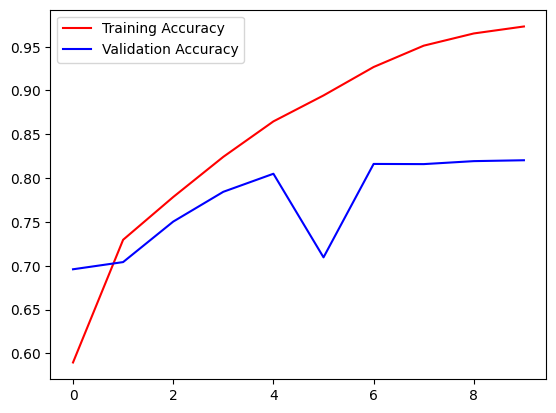

In [ ]:
## Ploting the accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color ='blue',label = 'Validation Accuracy')
plt.legend()
plt.show()

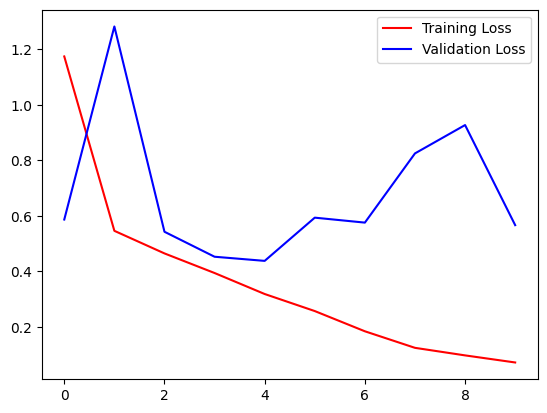

In [ ]:
## Ploting the Loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color = 'red', label = 'Training Loss')
plt.plot(history.history['val_loss'], color ='blue',label = 'Validation Loss')
plt.legend()
plt.show()

As we can observe the we are able to reduce the overfitting to an extent

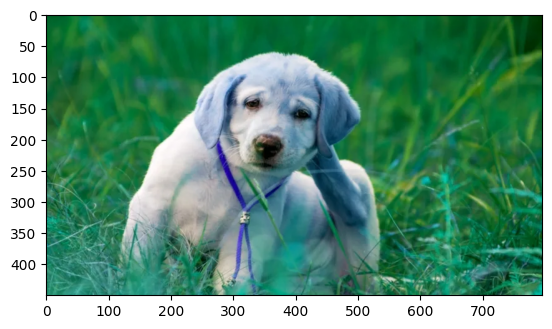

In [ ]:
## Checking the Model on an unseens data

## We will take 2 unseen pics from the google
## To make the image in right format we will be using cv2(computer vision2) library

import cv2

# Checking For Dog's Images

test_img = cv2.imread('/content/Dogo.webp') # Will be a numpy-array of Image

plt.imshow(test_img)

In [ ]:
# Checking Image Shape

test_img.shape

(450, 796, 3)

Image is of Large Size, we Need to convert it to 256,256 to feed into the model

In [ ]:
## Resizing the Image

## We will be using cv2.resize() functiuon for this operation.

test_img = cv2.resize(test_img, (256,256))

# Since we pass the images in our model in the form of batches so we reshape our image as (1,256,256,3) that mean there is only
# 1 Image mage tensor. it is basically a 4D matrix with only 1 3-D element in it


test_input = test_img.reshape((1,256,256,3)) # TO convert in to Batch

In [ ]:
## Making the predicitons

model.predict(test_input)

1/1 [==============================] - 0s 284ms/step


array([[1.]], dtype=float32)

As observed, Model is giving the right Precidction, 1 is class for Dogs

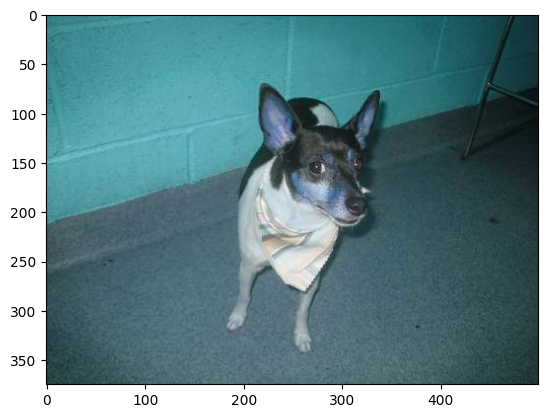

In [ ]:
# Checking for Cats' Image

test_img2 = cv2.imread('/content/train/dogs/dog.10002.jpg')

plt.imshow(test_img2)

In [ ]:
# Checing Image Shape

test_img2.shape

(375, 499, 3)

In [ ]:
# Resizing and Coverting into Batch

test_img2 = cv2.resize(test_img2, (256,256))

# Converting into Batch

test_input2 = test_img2.reshape((1,256,256,3)) # To convert into Batch with One Image in it

In [ ]:
## Checking the prediction

model.predict(test_input2)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

As observed, Model is giving the Class - '1' and it belongs to "Dogs" so model is giving wrong prediction.

# Data Augmentation to Reduce Overfitting

In [ ]:
## Data augmentation is a technique of artificially increasing the training set by creating modified copies of a
## dataset using existing data

## We tensorflow.keras.preprocessing.images.ImageDataGenerator() for this

from keras.preprocessing.image import ImageDataGenerator

train_obj = ImageDataGenerator(
    shear_range= 0.3,
    zoom_range= 0.3,
    horizontal_flip= True,
    rescale= 1.0/255.0
)

test_obj = ImageDataGenerator(rescale= 1.0/255.0)


In [ ]:
## Generating the Image

## To generate the image we use ImageDataGenerator.flow_from_directory()

# flow_from_dataframe(
#     dataframe,
#     directory=None,
#     x_col='filename',
#     y_col='class',
#     weight_col=None,
#     target_size=(256, 256),
#     color_mode='rgb',
#     classes=None,
#     class_mode='categorical',
#     batch_size=32,
#     shuffle=True,
#     seed=None,
#     save_to_dir=None,
#     save_prefix='',
#     save_format='png',
#     subset=None,
#     interpolation='nearest',
#     validate_filenames=True,
#     **kwargs
# )

## Important Arguments will be
# directory = path to the directory where data is store in form of labels
# target_size = Sizes in which we want out images to be.
# class_mode = we need to define the type of problem, Output could be 'binary', 'categorical'.
# batch_size = size of the batches of data(default is 32)

train_Img_generator = train_obj.flow_from_directory(
    directory= '/content/train',
    target_size= (256,256),  # As we have used same while building the model.
    batch_size = 32,
    class_mode= 'binary'
)

test_Ing_generator = train_obj.flow_from_directory(
    directory= '/content/test',
    target_size= (256,256),   # As we have used 256,256 earlier
    batch_size = 32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Model will be using the Generated Images Not the Original Images for training

In [ ]:
## Building the same Model

model = Sequential()
# Conv 1
model.add(Conv2D(32, kernel_size = (3,3), padding ='valid', activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding= 'valid'))
# Conv 2
model.add(Conv2D(64, kernel_size = (3,3), padding ='valid', activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding= 'valid'))
# Conv 3
model.add(Conv2D(128, kernel_size = (3,3), padding ='valid', activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2 , padding= 'valid'))
#Flattening
model.add(Flatten())
# Full Connected 2 Layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
# Compiling the Model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training the Model

history2 = model.fit(train_Img_generator, epochs =10, validation_data= test_Ing_generator)

Epoch 1/10
625/625 [==============================] - 400s 635ms/step - loss: 0.6438 - accuracy: 0.6235 - val_loss: 0.5818 - val_accuracy: 0.6926
Epoch 2/10
625/625 [==============================] - 387s 620ms/step - loss: 0.5273 - accuracy: 0.7394 - val_loss: 0.4629 - val_accuracy: 0.7838
Epoch 3/10
625/625 [==============================] - 395s 633ms/step - loss: 0.4669 - accuracy: 0.7797 - val_loss: 0.4803 - val_accuracy: 0.7720
Epoch 4/10
625/625 [==============================] - 389s 623ms/step - loss: 0.4340 - accuracy: 0.7966 - val_loss: 0.4587 - val_accuracy: 0.7864
Epoch 5/10
625/625 [==============================] - 384s 615ms/step - loss: 0.4127 - accuracy: 0.8112 - val_loss: 0.3936 - val_accuracy: 0.8200
Epoch 6/10
625/625 [==============================] - 384s 615ms/step - loss: 0.3882 - accuracy: 0.8248 - val_loss: 0.4085 - val_accuracy: 0.8102
Epoch 7/10
625/625 [==============================] - 383s 613ms/step - loss: 0.3704 - accuracy: 0.8349 - val_loss: 0.3823 -

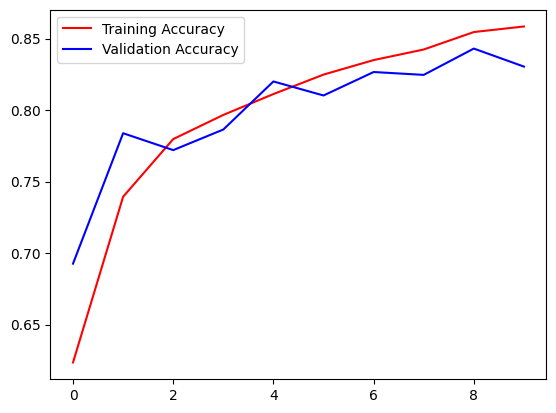

In [ ]:
## Ploting the accuracy

import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(history2.history['val_accuracy'], color ='blue',label = 'Validation Accuracy')
plt.legend()
plt.show()

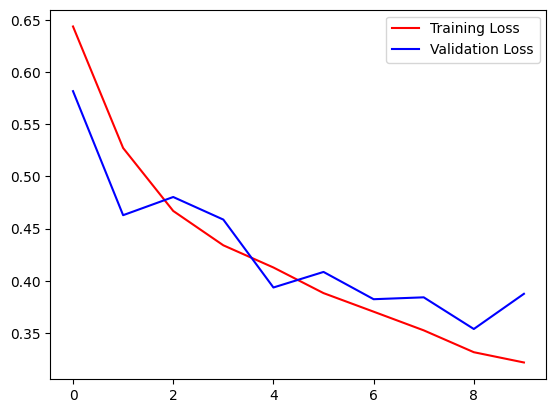

In [ ]:
## Ploting the Loss

import matplotlib.pyplot as plt

plt.plot(history2.history['loss'], color = 'red', label = 'Training Loss')
plt.plot(history2.history['val_loss'], color ='blue',label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
## Now if we observe, the overfitting has been drastically reduced using Data Augmentation.